In [234]:
import warnings 
warnings.filterwarnings('ignore')

In [235]:
import numpy as np 
import pandas as pd

In [236]:
# Visualization libraries
import matplotlib
matplotlib.use('Agg')  # use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')

In [237]:
import seaborn as sns

In [238]:
# For prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [239]:
# Ensure inline plotting
%matplotlib inline

In [240]:
# Set global aesthetics for plots
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

print('Imports and settings loaded successfully.')

Imports and settings loaded successfully.


# TEST

In [305]:
df = pd.read_csv("cryptocurrency.csv", sep=",")  

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170430 entries, 0 to 170429
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   timestamp   170430 non-null  object
 1   name        170430 non-null  object
 2   symbol      170430 non-null  object
 3   price_usd   170430 non-null  object
 4   vol_24h     170430 non-null  object
 5   total_vol   170430 non-null  object
 6   chg_24h     170430 non-null  object
 7   chg_7d      170430 non-null  object
 8   market_cap  170430 non-null  object
dtypes: object(9)
memory usage: 11.7+ MB


In [307]:
df.describe(include='all')

,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
count,170430,170430,170430,170430,170430,170430,170430,170430,170430
unique,6318,266,287,87208,115812,3629,4546,8166,87738
top,04-10-25 10:36,USDC,USDT,$1.00,$1.01B,0.00%,0.00%,0.00%,$8.30B
freq,250,6319,4891,10940,202,9464,4620,3723,258


In [308]:
missing_data_rows = df[df.isnull().any(axis=1)]
print(missing_data_rows)

Empty DataFrame
Columns: [timestamp, name, symbol, price_usd, vol_24h, total_vol, chg_24h, chg_7d, market_cap]
Index: []


In [309]:
df.isnull().sum()

timestamp     0
name          0
symbol        0
price_usd     0
vol_24h       0
total_vol     0
chg_24h       0
chg_7d        0
market_cap    0
dtype: int64

In [310]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
print(df.dtypes)

timestamp     datetime64[ns]
name                  object
symbol                object
price_usd             object
vol_24h               object
total_vol             object
chg_24h               object
chg_7d                object
market_cap            object
dtype: object


In [311]:
def convert_currency(value):
    value = str(value).replace('$', '').replace(',', '')
    
    if 'B' in value:
        return float(value.replace('B', '')) * 1e9
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    elif 'T' in value:
        return float(value.replace('T', '')) * 1e12
    else:
        try:
            return float(value)
        except ValueError:
            return np.nan 

cols_to_convert = ['price_usd', 'vol_24h', 'market_cap']

for col in cols_to_convert:
    df[col] = df[col].apply(convert_currency)

print(df.dtypes)
print(df.shape)
df.head()

timestamp     datetime64[ns]
name                  object
symbol                object
price_usd            float64
vol_24h              float64
total_vol             object
chg_24h               object
chg_7d                object
market_cap           float64
dtype: object
(170430, 9)


,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
0,2025-10-30 00:52:00,Wrapped stETH,wsteth,4816.53,8748771.0,0.00%,-0.78%,4.00%,1.609713e+10
1,2025-10-30 00:52:00,Wrapped eETH,weeth,4273.09,12633992.0,0.00%,-0.80%,4.68%,1.055238e+10
2,2025-10-30 00:52:00,LEO Token,leo,9.64,759309.0,0.00%,0.73%,7.24%,8.889204e+09
3,2025-10-30 00:52:00,MemeCore,m,2.35,12083262.0,0.00%,5.00%,8.28%,3.985137e+09
4,2025-10-30 00:52:00,Wrapped Beacon ETH,wbeth,4271.69,18698030.0,0.01%,-0.69%,4.56%,1.394323e+10


In [312]:
cols_to_percent = ['total_vol', 'chg_24h', 'chg_7d']
for col in cols_to_percent:
    df[col] = df[col].str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col] / 100
print(df.dtypes)
print(df.shape)
df.head()

timestamp     datetime64[ns]
name                  object
symbol                object
price_usd            float64
vol_24h              float64
total_vol            float64
chg_24h              float64
chg_7d               float64
market_cap           float64
dtype: object
(170430, 9)


,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
0,2025-10-30 00:52:00,Wrapped stETH,wsteth,4816.53,8748771.0,0.0000,-0.0078,0.0400,1.609713e+10
1,2025-10-30 00:52:00,Wrapped eETH,weeth,4273.09,12633992.0,0.0000,-0.0080,0.0468,1.055238e+10
2,2025-10-30 00:52:00,LEO Token,leo,9.64,759309.0,0.0000,0.0073,0.0724,8.889204e+09
3,2025-10-30 00:52:00,MemeCore,m,2.35,12083262.0,0.0000,0.0500,0.0828,3.985137e+09
4,2025-10-30 00:52:00,Wrapped Beacon ETH,wbeth,4271.69,18698030.0,0.0001,-0.0069,0.0456,1.394323e+10


In [313]:
df.isnull().sum()

timestamp      0
name           0
symbol         0
price_usd      0
vol_24h        0
total_vol      0
chg_24h       63
chg_7d        18
market_cap     0
dtype: int64

In [314]:
missing_data_rows = df[df.isnull().any(axis=1)]
print(missing_data_rows)

                timestamp              name      symbol  price_usd  \
6362  2025-10-27 14:52:00      Figure Heloc  figr_heloc       1.00   
6439  2025-10-27 14:40:00      Figure Heloc  figr_heloc       1.00   
6452  2025-10-27 14:20:00      Figure Heloc  figr_heloc       1.00   
6549  2025-10-27 13:48:00      Figure Heloc  figr_heloc       1.00   
6553  2025-10-27 13:28:00      Figure Heloc  figr_heloc       1.00   
...                   ...               ...         ...        ...   
72249 2025-04-10 10:39:00        DoubleZero          2z       0.52   
72255 2025-04-10 10:39:00  Currency One USD       c1usd       1.00   
72390 2025-04-10 10:36:00  Currency One USD       c1usd       1.00   
72411 2025-04-10 10:36:00        DoubleZero          2z       0.52   
72491 2025-04-10 10:36:00    Falcon Finance          ff       0.20   

           vol_24h  total_vol  chg_24h  chg_7d    market_cap  
6362        1500.0     0.0000      NaN     0.0  1.325452e+10  
6439        1500.0     0.0000    

In [315]:
print(df.isnull().sum())
nan_percentage = df.isnull().mean() * 100
print(nan_percentage)

timestamp      0
name           0
symbol         0
price_usd      0
vol_24h        0
total_vol      0
chg_24h       63
chg_7d        18
market_cap     0
dtype: int64
timestamp     0.000000
name          0.000000
symbol        0.000000
price_usd     0.000000
vol_24h       0.000000
total_vol     0.000000
chg_24h       0.036965
chg_7d        0.010562
market_cap    0.000000
dtype: float64


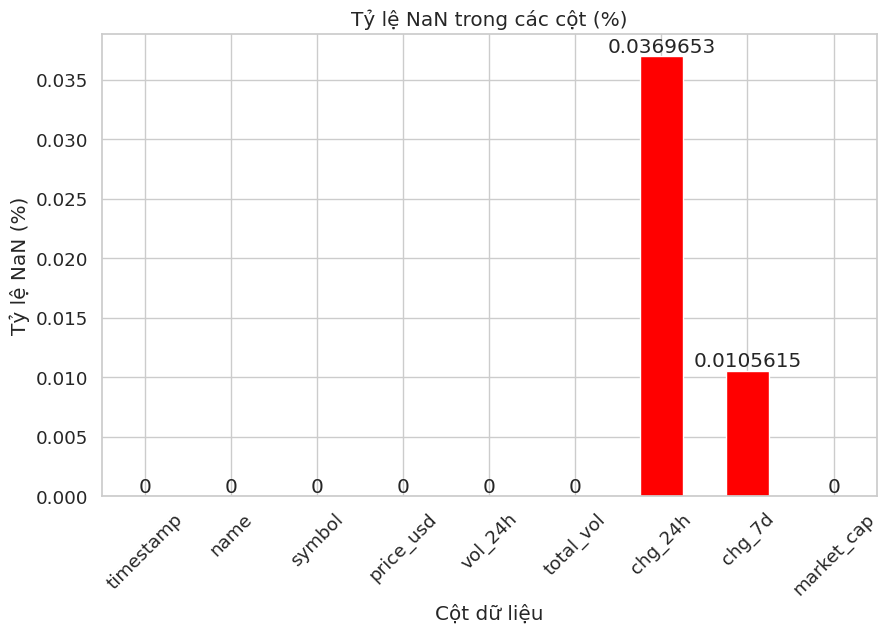

In [316]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
nan_percentage.plot(kind='bar', color='red', ax=ax)
ax.bar_label(ax.containers[0])

plt.title('Tỷ lệ NaN trong các cột (%)')
plt.xlabel('Cột dữ liệu')
plt.ylabel('Tỷ lệ NaN (%)')

plt.xticks(rotation=45)

plt.show()

In [317]:
df[['chg_24h', 'chg_7d']] = df[['chg_24h', 'chg_7d']].apply(lambda col: col.fillna(col.mean()))

In [318]:
df.isnull().sum()
missing_data_rows = df[df.isnull().any(axis=1)]
print(missing_data_rows)

Empty DataFrame
Columns: [timestamp, name, symbol, price_usd, vol_24h, total_vol, chg_24h, chg_7d, market_cap]
Index: []


In [319]:
df_1 = df.copy()

In [320]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_1['name_encoded'] = label_encoder.fit_transform(df_1['name'])
print(df_1[['name', 'name_encoded']])

                      name  name_encoded
0            Wrapped stETH           251
1             Wrapped eETH           250
2                LEO Token           119
3                 MemeCore           138
4       Wrapped Beacon ETH           247
...                    ...           ...
170425             Bitcoin            36
170426            Ethereum            76
170427                  Pi           161
170428                TRON           210
170429         Tether USDt           214

[170430 rows x 2 columns]


In [321]:
name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping cho cột 'name':", name_mapping)

Mapping cho cột 'name': {'0G': 0, '1INCH': 1, 'AB': 2, 'AI Companions': 3, 'AIOZ Network': 4, 'APENFT': 5, 'Aave': 6, 'Aerodrome Finance': 7, 'Aethir': 8, 'Algorand': 9, 'ApeCoin': 10, 'Aptos': 11, 'Arbitrum': 12, 'Arbitrum Bridged WBTC (Arbitrum One)': 13, 'Arbitrum Bridged WETH (Arbitrum One)': 14, 'Arbitrum Bridged Wrapped eETH (Arbitrum)': 15, 'Artificial Superintelligence Alliance': 16, 'Arweave': 17, 'Aster': 18, 'Aster Staked BNB': 19, 'Aster USDF': 20, 'Avalanche': 21, 'Avalanche Bridged BTC (Avalanche)': 22, 'Axie Infinity': 23, 'BENQI Liquid Staked AVAX': 24, 'BFUSD': 25, 'BNB': 26, 'Beam': 27, 'Beldex': 28, 'Berachain': 29, 'Binance Bridged USDC (BNB Smart Chain)': 30, 'Binance Bridged USDT (BNB Smart Chain)': 31, 'Binance Staked SOL': 32, 'Binance-Peg Dogecoin': 33, 'Binance-Peg WETH': 34, 'BitTorrent': 35, 'Bitcoin': 36, 'Bitcoin Cash': 37, 'Bitcoin SV': 38, 'Bitget Token': 39, 'Bittensor': 40, 'BlackRock USD Institutional Digital Liquidity Fund': 41, 'Bonk': 42, 'Brett': 

In [322]:
df_1

,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap,name_encoded
0,2025-10-30 00:52:00,Wrapped stETH,wsteth,4816.530000,8.748771e+06,0.0000,-0.0078,0.0400,1.609713e+10,251
1,2025-10-30 00:52:00,Wrapped eETH,weeth,4273.090000,1.263399e+07,0.0000,-0.0080,0.0468,1.055238e+10,250
2,2025-10-30 00:52:00,LEO Token,leo,9.640000,7.593090e+05,0.0000,0.0073,0.0724,8.889204e+09,119
3,2025-10-30 00:52:00,MemeCore,m,2.350000,1.208326e+07,0.0000,0.0500,0.0828,3.985137e+09,138
4,2025-10-30 00:52:00,Wrapped Beacon ETH,wbeth,4271.690000,1.869803e+07,0.0001,-0.0069,0.0456,1.394323e+10,247
...,...,...,...,...,...,...,...,...,...,...
170425,2025-03-17 00:34:00,Bitcoin,BTC,82953.800000,1.936000e+10,0.3182,-0.0166,0.0045,1.640000e+12,36
170426,2025-03-17 00:34:00,Ethereum,ETH,1897.140000,9.020000e+09,0.1498,-0.0267,-0.0682,2.280700e+11,76
170427,2025-03-17 00:34:00,Pi,PI,1.401200,4.837500e+08,0.0085,-0.0391,0.0332,9.740000e+09,161
170428,2025-03-17 00:34:00,TRON,TRX,0.212986,5.876900e+08,0.0103,-0.0403,-0.0958,2.023000e+10,210


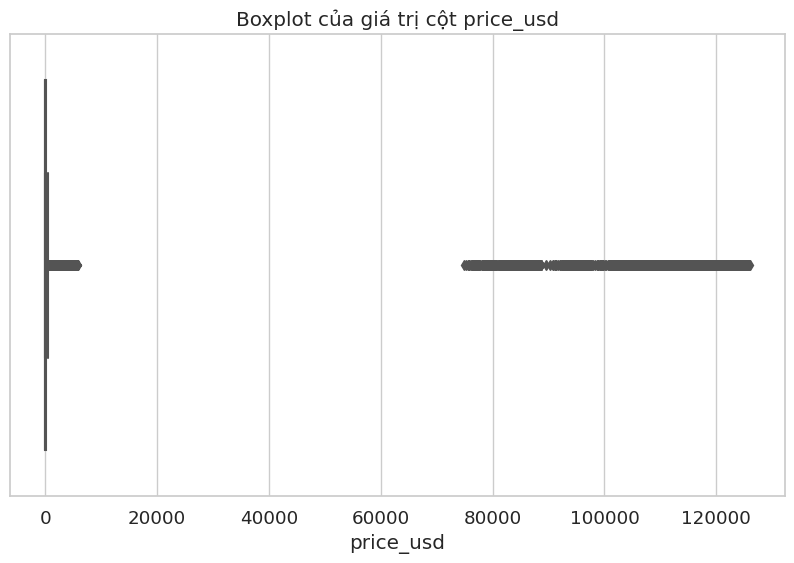

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ Boxplot để phát hiện ngoại lệ trong cột 'price_usd'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_1['price_usd'])
plt.title('Boxplot của giá trị cột price_usd')
plt.show()

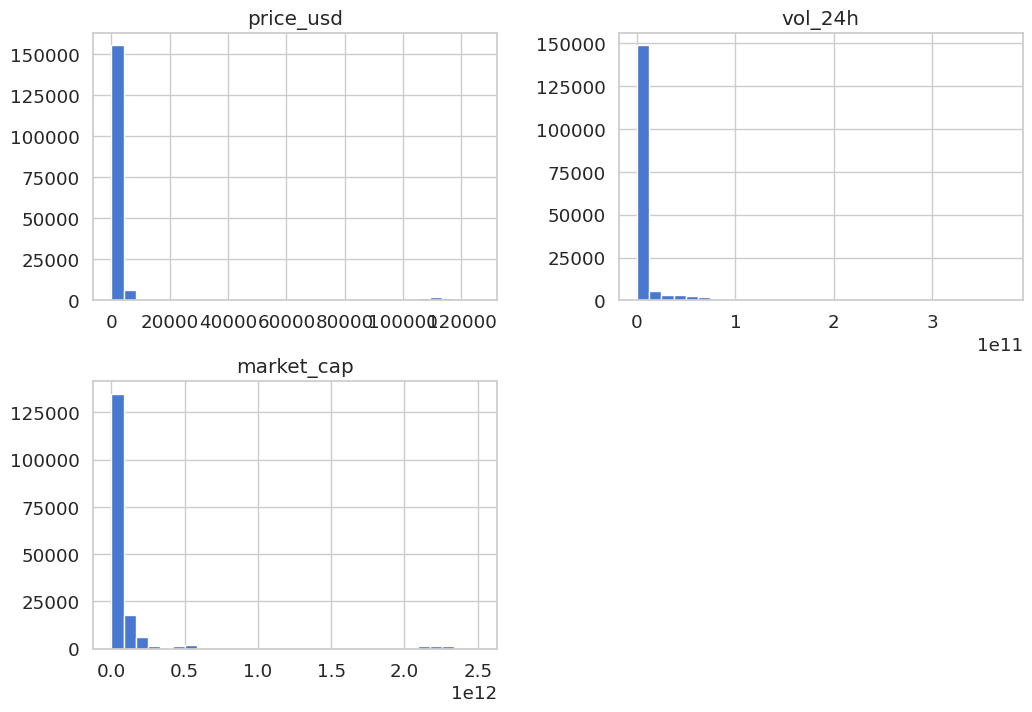

In [324]:
df_1[['price_usd', 'vol_24h', 'market_cap']].hist(bins=30, figsize=(12, 8))
plt.show()

In [325]:
df_1.to_csv('processed1_crypto_data.csv', index=False, encoding='utf-8')